In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import pandas as pd
%matplotlib inline

In [44]:
data = pd.read_csv('i1.csv')
data

,Unnamed: 0,date,load,work,temp,dewp,SKC,year,week,doy,hour,pload,lyload,lwload,ldload
0,0,2015-07-01 08:00:00,1605.0,1,73.0,64.0,0.0,2015,27,182,8,1471,NaN,NaN,NaN
1,1,2015-07-01 09:00:00,1537.0,1,73.0,64.0,0.0,2015,27,182,9,1418,NaN,NaN,NaN
2,2,2015-07-01 10:00:00,1487.0,1,74.0,64.0,0.0,2015,27,182,10,1376,NaN,NaN,NaN
3,3,2015-07-01 11:00:00,1470.0,1,73.0,64.0,0.0,2015,27,182,11,1354,NaN,NaN,NaN
4,4,2015-07-01 12:00:00,1503.0,1,73.0,66.0,0.0,2015,27,182,12,1346,NaN,NaN,NaN
5,5,2015-07-01 13:00:00,1511.0,1,72.0,65.0,0.0,2015,27,182,13,1378,NaN,NaN,NaN
6,6,2015-07-01 14:00:00,1566.0,1,75.0,64.0,0.0,2015,27,182,14,1454,NaN,NaN,NaN
7,7,2015-07-01 15:00:00,1612.0,1,77.0,64.0,0.0,2015,27,182,15,1581,NaN,NaN,NaN
8,8,2015-07-01 16:00:00,1655.0,1,82.0,63.0,0.0,2015,27,182,16,1734,NaN,NaN,NaN
9,9,2015-07-01 17:00:00,1805.0,1,85.0,62.0,0.0,2015,27,182,17,1896,NaN,NaN,NaN


In [45]:
data.date = pd.to_datetime(data.date)
data['dayavg'] = data.load.rolling(24).mean()
features = ['temp', 'hour', 'work', 'SKC', 'doy', 'dewp', 'ldload', 'lyload', 'lwload', 'dayavg']
test = data.set_index('date')['2018'].reset_index()
training = data.set_index('date')[:'2017'].reset_index()

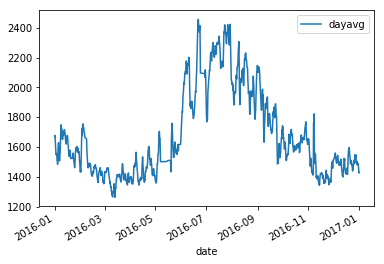

In [46]:
d = data.set_index('date')
d['f'] = d.lyload - d.load
d['dayavg'] = d.load.rolling(24).mean()
d['2016'].plot( y='dayavg')

In [47]:
training = training[features+['load']].dropna()
test = test[features+['load']].dropna()
x_train, y_train = training[features].values, training['load'].values
x_test, y_test = test[features].values, test['load'].values
training

,temp,hour,work,SKC,doy,dewp,ldload,lyload,lwload,dayavg,load
8347,87.0,8,1,0.0,188,48.0,1707.0,1517.0,1849.0,2212.833333,1759.0
8348,87.0,9,1,0.0,188,45.0,1636.0,1472.0,1729.0,2215.708333,1705.0
8349,83.0,10,1,0.0,188,61.0,1571.0,1447.0,1648.0,2219.416667,1660.0
8350,82.0,11,1,0.0,188,62.0,1569.0,1434.0,1638.0,2223.583333,1669.0
8351,81.0,12,1,0.0,188,62.0,1596.0,1465.0,1695.0,2227.208333,1683.0
8352,80.0,13,1,0.0,188,63.0,1618.0,1490.0,1730.0,2230.208333,1690.0
8353,82.0,14,1,0.0,188,62.0,1735.0,1539.0,1782.0,2232.958333,1801.0
8354,85.0,15,1,0.0,188,61.0,1879.0,1578.0,1884.0,2234.958333,1927.0
8355,88.0,16,1,0.0,188,59.0,2043.0,1661.0,2008.0,2235.583333,2058.0
8356,92.0,17,1,0.0,188,56.0,2191.0,1794.0,2136.0,2234.791667,2172.0


In [48]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [56]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(2048,
                           input_shape=(x_train.shape[1],)),
        keras.layers.Dense(1024),
        keras.layers.Dense(512),
        keras.layers.Dense(256),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mape'])
    return model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 2048)              22528     
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 257       
Total params: 2,777,089
Trainable params: 2,777,089
Non-trainable params: 0
_________________________________________________________________


In [57]:
EPOCHS = 500

# Store training stats
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, 
                    batch_size=100, verbose=3)

Train on 9625 samples, validate on 2407 samples
Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500

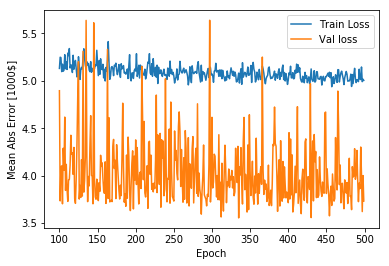

In [58]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch[100:], np.array(history.history['mean_absolute_percentage_error'][100:]),
           label='Train Loss')
    plt.plot(history.epoch[100:], np.array(history.history['val_mean_absolute_percentage_error'][100:]),
           label = 'Val loss')
    plt.legend()

plot_history(history)

In [59]:
[loss,mpe] = model.evaluate(x_test, y_test, verbose=0)


print("Testing set Mean Abs percent Error: {:7.2f}".format(mpe))

Testing set Mean Abs percent Error:    4.28
